# Unsupervised Predict- Movie Recomendation

<img src="https://posteet.com/wp-content/uploads/2019/11/movies.png" width=90%>

# Table of content


- List subheadings we have in this notebook

## 1. Introduction

- Here will intro what the predict is about and our problem statemnt

In [240]:
#pip install scikit-surprise

## 2. Importing liabraries

In [287]:
# utilities
import numpy as np
import pandas as pd

#pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#plotting
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set()

from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
#from surprise import Reader, Dataset, SVD, evaluate

## 3. Uploading the dataset

In [245]:
train = pd.read_csv('C:/Users/siyam/MovieData/train.csv')
test = pd.read_csv('C:/Users/siyam/MovieData/test.csv')
scores = pd.read_csv('C:/Users/siyam/MovieData/genome_scores.csv')
tags = pd.read_csv('C:/Users/siyam/MovieData/genome_tags.csv')
imbd = pd.read_csv('C:/Users/siyam/MovieData/imdb_data.csv')
links = pd.read_csv('C:/Users/siyam/MovieData/links.csv')
movies = pd.read_csv('C:/Users/siyam/MovieData/movies.csv')
sample = pd.read_csv('C:/Users/siyam/MovieData/sample_submission.csv')

In [246]:
train = train[0:5000]
train

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
4995,150494,54272,4.5,1526539850
4996,88320,3578,4.0,1470020592
4997,84576,785,3.0,1002058094
4998,106550,2706,3.0,1440958601


In [247]:
train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

In [248]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [249]:
scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [250]:
tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [251]:
imbd.head()


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [252]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [253]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [254]:
sample.head()


,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


- here we will upload and subset the dataset givven

## 4. Pre-processing

In [255]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [256]:
# create short list of unwanted columns
labels = ['rating']

# declare the features to be all columns, less the unwanted ones from above
features = [col for col in train.columns if col not in labels]

In [257]:
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

# using plotly to plot the boxplot
train[features].iplot(kind='box', title="Boxplots of Features (Unscaled)")

In [258]:
# create scaler object
scaler = StandardScaler()

# define scaled data frame variable
train[features] = preprocessing.scale(train[features])

# plot boxplots using scaled data
train[features].iplot(kind='box', title="Boxplots of Features (Scaled)")

C:\Users\siyam\Anaconda3\New folder\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

### 4.1 PCA

In [259]:
train.head()

,userId,movieId,rating,timestamp
0,-1.615057,0.972603,4.0,1.360679
1,0.545120,-0.538228,4.5,-0.017474
2,1.408658,-0.395330,5.0,-0.591603
3,0.545526,0.307816,2.0,0.939841
4,-1.532262,-0.528769,3.0,-1.663882


Text(0, 0.5, 'Cumulative explained variance')

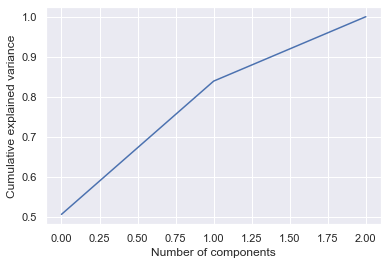

In [260]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(train[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)

pca_df["Ratings"] = train["rating"]

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [261]:
pca_85 = PCA(.85)
pca_85.fit_transform(train[features])
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

100.0 % of variance explained by 3 components.


In [262]:
pca_75 = PCA(.75)
pca_75.fit_transform(train[features])
print(round(pca_75.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

83.9 % of variance explained by 3 components.


In [263]:
pca.explained_variance_ratio_[:3]

array([0.50582523, 0.33314725, 0.16102752])

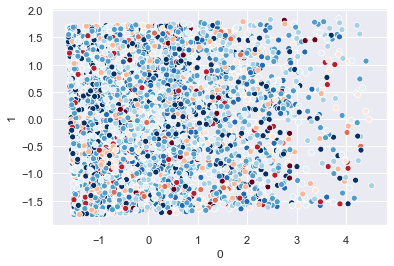

In [264]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
                     hue="Ratings",
                     palette='RdBu',
                     data=pca_df,
                     legend=False)
plt.show()

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

### 4.2 Dimension reduction

In [265]:
# exclude non-features from data
reg_data = pca_df

# set aside response variable (Unscaled!)
reg_response = pca_df["Ratings"]

# unseen data
#test 

# drop response variable
reg_data = reg_data.drop(['Ratings'], 1)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(reg_data, reg_response, test_size=0.2)

In [267]:
# create PCA object with n_components set to 3
pca_reg = PCA(n_components=2)

# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_reg.fit_transform(X_train)

# confirm the number of components
pca_reg.n_components_

2

In [268]:
pca_reg.explained_variance_ratio_.sum()

0.8393621265025211

In [269]:
X_test = pca_reg.transform(X_test)

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

##  5. FITTING MODELS USING PCA

### 5.1 Random Forest

In [295]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3, 4, 5],
    'min_samples_split': [4,8, 10, 12],
    'n_estimators': [100, 200, 300, 1000, 2000]
}

In [296]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [297]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1120 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 50.5min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed: 50.7min finished


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=90, max_features=2,
                                             min_samples_leaf=5,
                                             min_samples_split=12,
                                             n_estimators=1000),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [20, 30, 40, 80, 90, 100, 110],
                         'max_features': [2, 3],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000, 2000]},
             verbose=2)

In [300]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [308]:
# instantiate model with 1000 decision trees
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap = True, max_depth = 20, max_features = 2, min_samples_leaf = 4, min_samples_split = 12, 
                           n_estimators=100)

# train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=2, min_samples_leaf=4,
                      min_samples_split=12)

In [309]:
# use the forest's predict method on the test data
pred = rf.predict(X_test)

#checking score
mean_squared_error(y_test, pred, squared=False)

1.1198580297770568

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

### 5.2 xgboost

In [273]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15,20,30,40],
 "min_child_weight" : [ 1, 3, 5, 7 ,9,10,11,12],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,1,2],
 "colsample_bytree" : [ 0.2,0.3, 0.4, 0.5 , 0.7,0.8 ]
 
    
}

In [274]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
boost = xgb.XGBRegressor()

In [278]:
random_search=RandomizedSearchCV(boost,param_distributions=params,n_iter=5,n_jobs=2,cv=5,verbose=3)

In [279]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed:    9.0s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [280]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=4,
             min_child_weight=11, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [281]:
import xgboost as xgb
boost = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=4,
             min_child_weight=11, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
##Fitting the model with train dataset
boost = boost.fit(X_train, y_train)

In [282]:
# Getting predicions from the X_test
pred0 = boost.predict(X_test)
#checking score
mean_squared_error(y_test, pred0, squared=False)

1.098864299110745

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

 # 6. Using the models on the testdata

In [310]:
# Getting predictions from the unseen data
pred = rf.predict(test)
#pred0 = boost.predict(test)
#pred1 = SVC.predict(x_unseen)
#pred2 = BNB.predict(x_unseen)

In [311]:
print(pred)
#print(pred0)
#print(pred1)
#print(pred2)


[3.52031142 3.52031142 3.52031142 ... 3.60871161 3.60871161 3.60871161]


In [312]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [313]:
test['Id'] = test['userId'].map(str)+ "_" +test['movieId'].map(str)
test.head()

,userId,movieId,Id
0,1,2011,1_2011
1,1,4144,1_4144
2,1,5767,1_5767
3,1,6711,1_6711
4,1,7318,1_7318


In [314]:
sample.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

##  7. Submissions

In [315]:
#Sellecting the index of the test dataframe
final_test= test["Id"]

In [316]:
#Creating the submission Dataframe
Final_Table = {'Id': final_test, 'rating':np.round(pred, 1)}
submission = pd.DataFrame(data=Final_Table)
submission = submission[['Id', 'rating']]

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

### 7.1  submissions to csvs

In [317]:
submission.to_csv("TestSubmission.csv",index  = False) #wrting csv file

In [ ]:
submission0.to_csv("TestSubmission0.csv",index  = False) #wrting csv file